In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

C:\Users\omkar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [3]:
X= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
df.shape

(11162, 17)

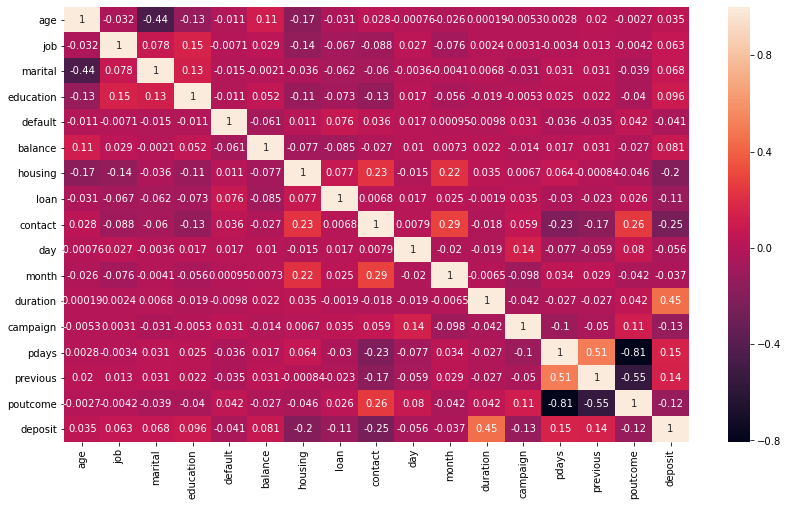

In [7]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
dt.score(X_train,y_train) # model is overfited

1.0

In [10]:
y_pred = dt.predict(X_test)

In [11]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1165
           1       0.78      0.78      0.78      1068

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233

[[925 240]
 [233 835]]


In [12]:
dt2 = DecisionTreeClassifier(max_depth=9)
dt2.fit(X_train,y_train)
y_pred = dt2.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1165
           1       0.80      0.80      0.80      1068

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

[[950 215]
 [210 858]]


In [13]:
dt3 = DecisionTreeClassifier(min_samples_leaf=20)
dt3.fit(X_train,y_train)
y_pred = dt3.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1165
           1       0.82      0.83      0.83      1068

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233

[[972 193]
 [178 890]]


In [14]:
dt4 = DecisionTreeClassifier(min_samples_leaf=20,criterion="entropy")
dt4.fit(X_train,y_train)
y_pred = dt4.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1165
           1       0.81      0.85      0.83      1068

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233

[[957 208]
 [159 909]]


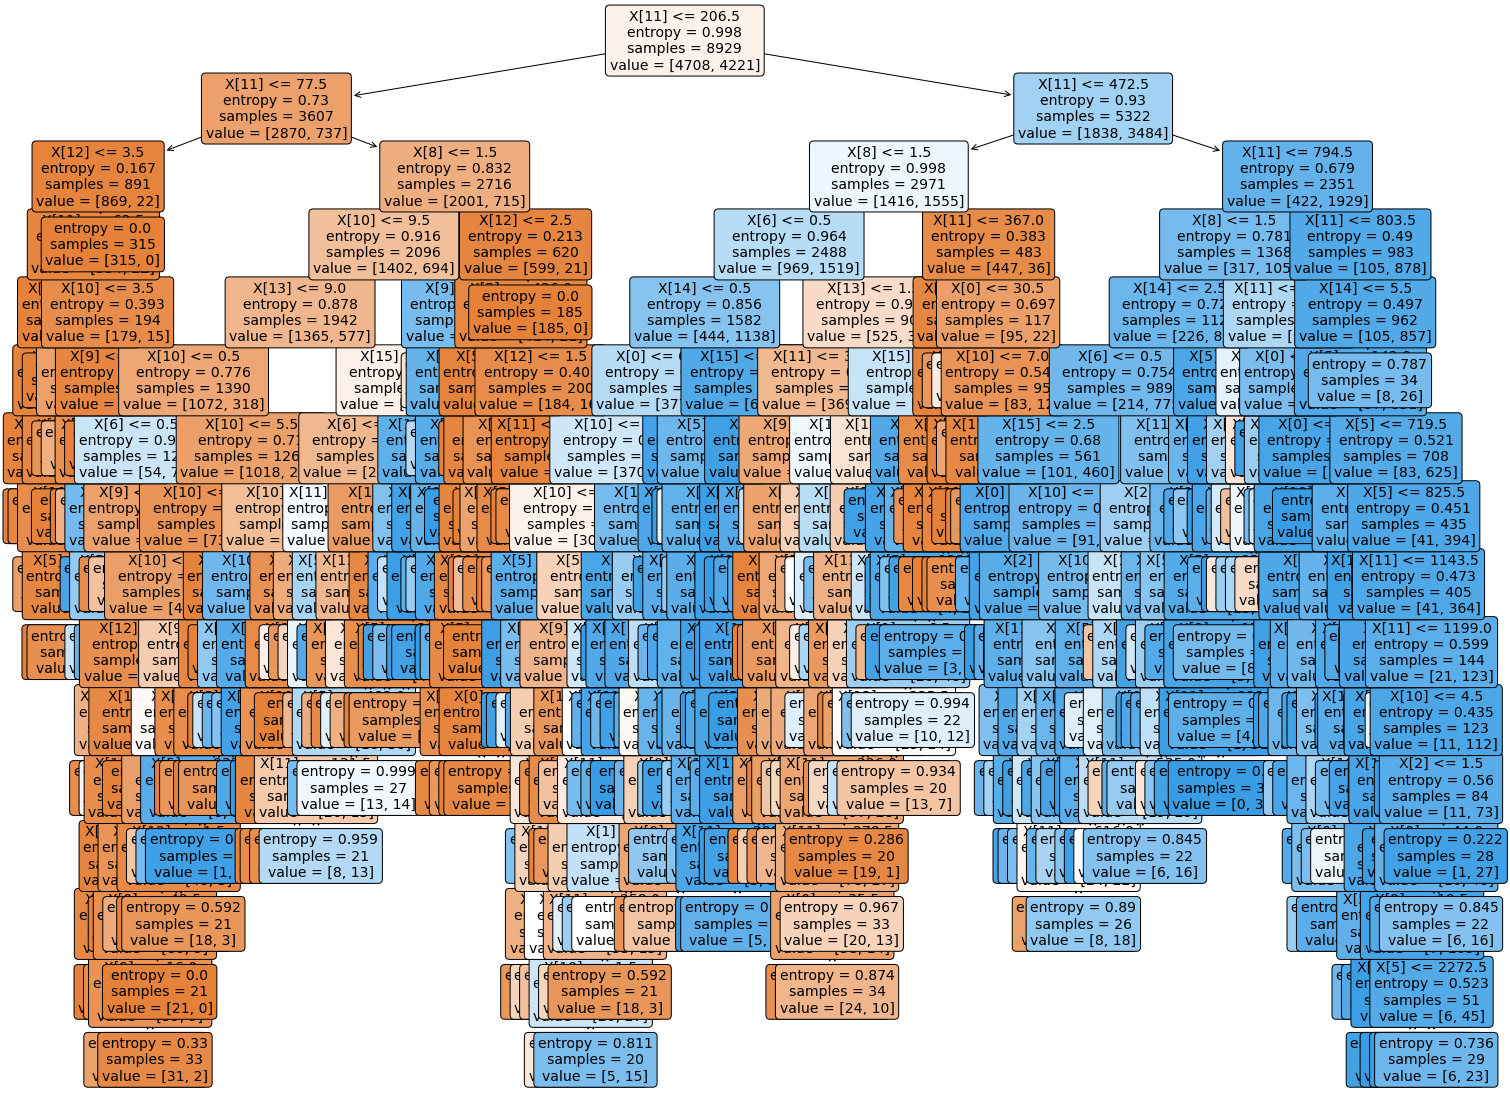

In [15]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt4,
                   filled=True, 
                  rounded=True, 
                  fontsize=14)

### Theory

#### Use to make smart Decision

### Constructing Decision Tree all About finding Attribute that return Highest Information Gain

#### How will u decide Best Attribute.

##### Attribute with Highest Information Gain is Best Attribute.

### Decision Tree has Low Bias and High Varience